## Step 1: Reading the Data

- Importing data using the pandas library
- Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load and Understand the dataset

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,  export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [153]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [154]:
data.shape 

(150, 6)

Removing unnecessary column

In [155]:
data = data.drop(columns=['Id'],axis=1)

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [159]:
# Returns Statistical information
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [158]:
# check for null values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Correlation** shows the strength of a relationship between two variables and is expressed numerically by the correlation coefficient. 
- The correlation coefficient's values range between -1.0 and 1.0. 
- A perfect positive correlation means that the correlation coefficient is exactly 1

In [160]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## Step 2: Visualising the Data

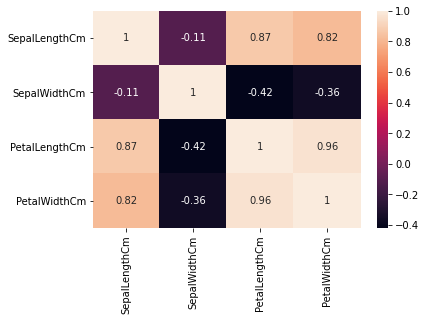

In [161]:
sns.heatmap(data.corr(), annot=True)
plt.show()

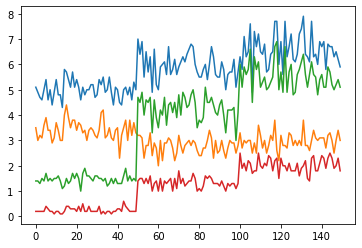

In [162]:
plt.plot(data.iloc[:,:4])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


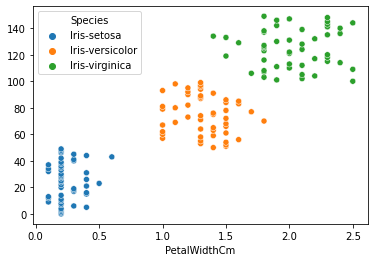

In [163]:
sns.scatterplot(data['PetalWidthCm'],data.index,hue = data.Species)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


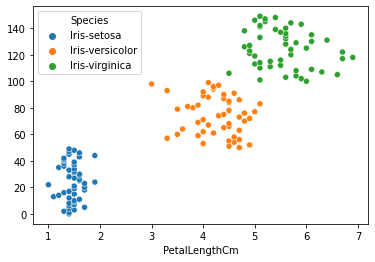

In [164]:
sns.scatterplot(data['PetalLengthCm'],data.index,hue = data.Species)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


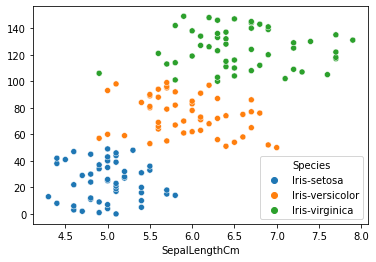

In [165]:
sns.scatterplot(data['SepalLengthCm'],data.index,hue = data.Species)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


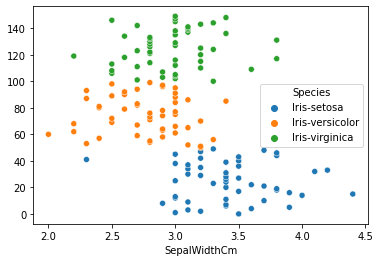

In [166]:
sns.scatterplot(data['SepalWidthCm'],data.index,hue = data.Species)
plt.show()

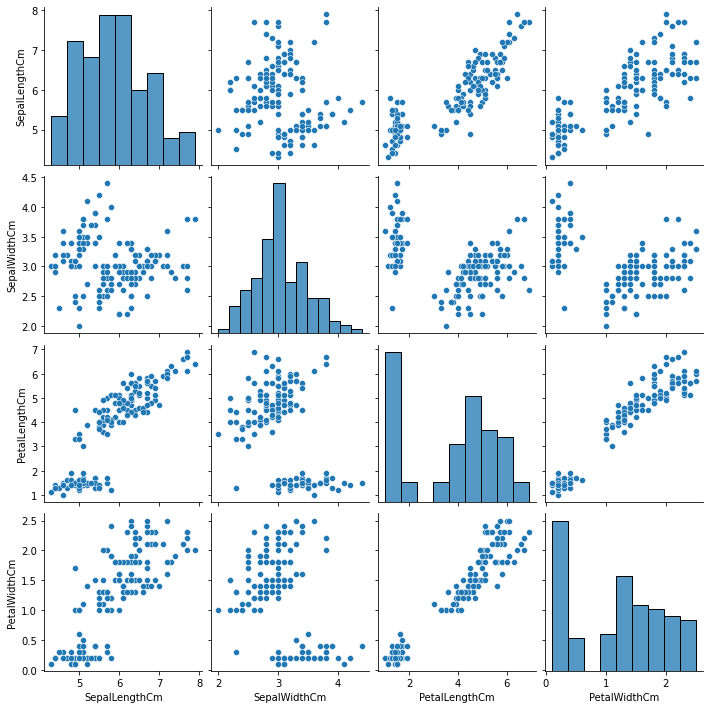

In [167]:
sns.pairplot(data)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


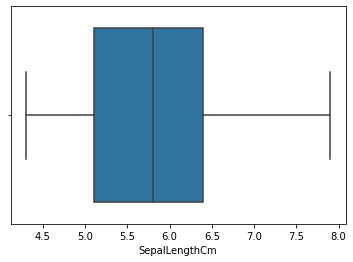

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


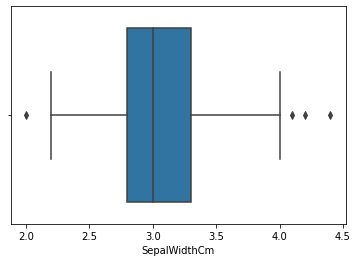

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


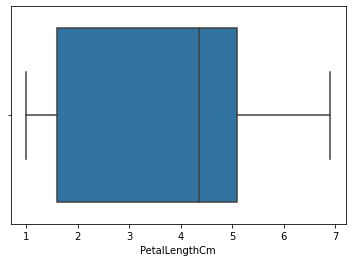

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


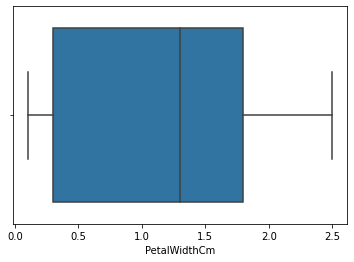

In [168]:
# checking Outliers
for i in data.describe().columns:
    sns.boxplot(data[i])
    plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


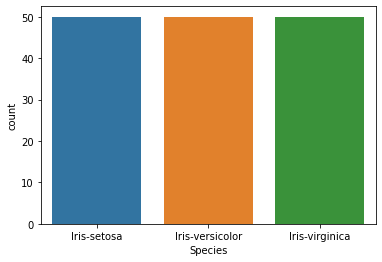

In [169]:
sns.countplot(data.Species)
plt.show()

## Step 3: Data Pre-Processing
**Removing outliers** 


In [170]:
out = data['SepalWidthCm'].quantile(0.99)

In [171]:
# we are removing the top 1% data from the SepalWidthCm 

cleaned_data = data[data['SepalWidthCm'] < out]
cleaned_data.shape

(148, 5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

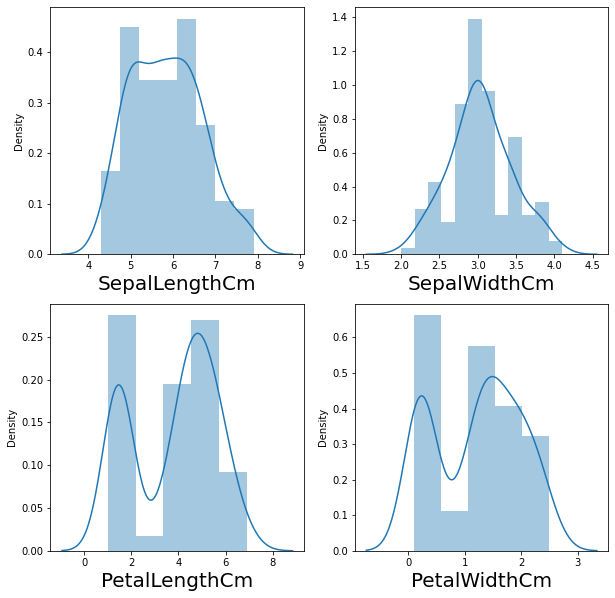

In [172]:
# let's see how data is distributed for every column

plt.figure(figsize=(10,10), facecolor='white')
plotnumber = 1

for column in cleaned_data.iloc[:,:4]:
    if plotnumber<=9 :
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(cleaned_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [173]:

cleaned_data.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        48
Name: Species, dtype: int64

**Separate dependent and independent variables**


In [174]:
X = cleaned_data.drop(columns=['Species'],axis=1)   # independent variables
y = cleaned_data['Species']                         # dependent variable

In [175]:
X.shape

(148, 4)

## Splitting data into train and test

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [177]:
X_train.shape, X_test.shape

((118, 4), (30, 4))

## Step 4: Building a Model
- dependent data is in categorical in nature that's why we use decision tree for classification
- Decision tree algorithm is one of the most versatile algorithms in machine learning which can perform both classification and regression analysis. 
- It is very powerful and works great with complex datasets.

In [178]:
dtc = DecisionTreeClassifier()

## Grid Search
- Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model.
- This is significant as the performance of the entire model is based on the hyper parameter values specified.


we can pass any random value for hyper parameter but we might get confused which value should we choose, so for that we take some random values, and create list of those values. here we take some possible list for max_depth, max_leaf_nodes, min_samples_leaf, min_samples_split,  splitter and criterion

- GridSearchCV function check for all the possible combination for models, and gives which is the best value out of this list and check which parameter is best for model.
- we can calculate it for Regression problem also but the thing is parameters may changes

In [179]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random'],
    'max_leaf_nodes':[10,20,50,100],
    
}

- `criterion` : string, optional (default="gini")

    - The function to measure the quality of a split. Supported criteria are
"gini" for the Gini impurity and "entropy" for the information gain.

- `max_depth` : int or None, optional (default=None) The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

- `min_samples_leaf` : int, float, optional (default=1) The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

- `min_samples_split` : int, float, optional (default=2) The minimum number of samples required to split an internal node.

- `splitter` : string, optional (default="best") The strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.

- `max_leaf_nodes` : int or None, optional (default=None) Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.


In [180]:
grid_search = GridSearchCV(estimator=dtc,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [181]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [182]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 14, 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 9, 'splitter': 'random'}


In [183]:
grid_search.best_score_

0.9829710144927537

**Build a model using best parameters**

In [184]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth =14, max_leaf_nodes= 20, min_samples_leaf= 2, min_samples_split= 9, splitter ='random')
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [185]:
Y_test_pred = dtc.predict(X_test)
Y_train_pred = dtc.predict(X_train)

Accuracy for train and test data

In [186]:
acc_test = accuracy_score(y_test,Y_test_pred)
acc_train = accuracy_score(y_train,Y_train_pred)

In [187]:
print("Accuracy for train Data: ",acc_train)
print("Accuracy for test Data: ",acc_test)

Accuracy for train Data:  0.9745762711864406
Accuracy for test Data:  0.9666666666666667


- From above we can see that accuracy for train and test data quite similar so we can conclude that model is neither overfitting nor underfitting

Note :- we must understand that giving all the hyperparameters in the gridSearch doesn't gurantee the best result. We have to do hit and trial with parameters to get the perfect score.

**Confusion Matrix for test data**

In [188]:
con_mat = confusion_matrix(y_test,Y_test_pred)

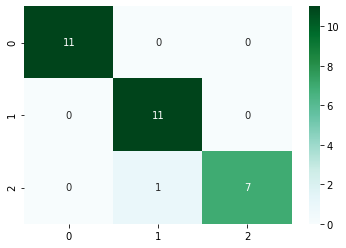

In [189]:
sns.heatmap(confusion_matrix(y_test,Y_test_pred),annot = True,cmap = 'BuGn')
plt.show()

**Let's visualize the tree:**

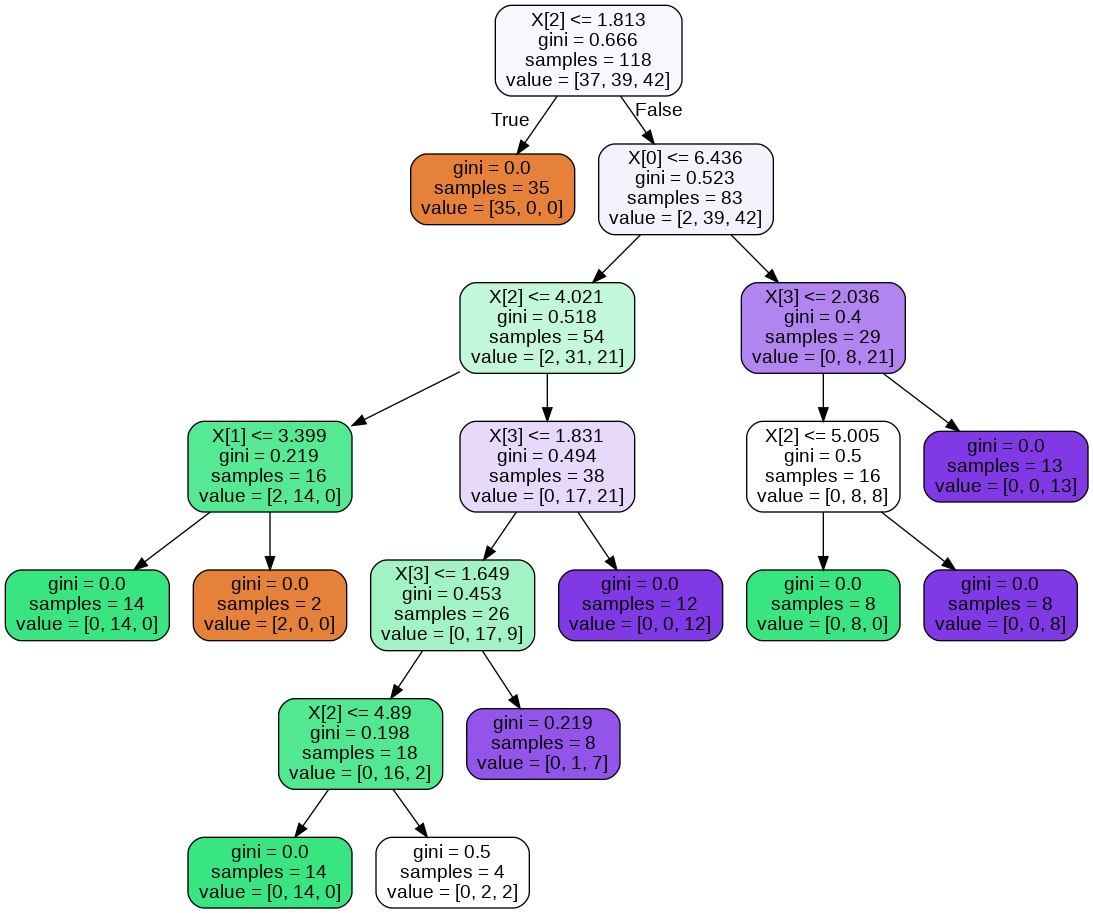

In [190]:
feature_name=list(X.columns)
class_name = list(y_train.unique())

# create a dot_file which stores the tree structure
dot_data = export_graphviz(dtc,rounded = True,filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())